In [1]:

import pandas as pd
import sys

sys.path.insert(1, '../')

from rule_benchmark import *

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
FOLDERS = ["approach1", "approach2"]

In [4]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


In [5]:
# The K parameter selects how many defuzzified predictions are used in order of decreasing confidence
#pick random 1000 elements

X_train=train.sample(n=100)
X_test=test.sample(n=100)


fiss, algo_ranking = benchmark_rules("approach1/", X_train, X_test, K=1, n=600, suitability=True,method="cog")
fiss, algo_ranking = benchmark_rules("approach2/", X_train, X_test, K=1, n=600, suitability=True,method="cog")

Number of rules:  475
Number of input variables:  6
Number of output variables:  50

approach1/:

Suitability LinkedCells_AoS_lc_c01_disabled:


  0%|          | 0/100 [00:00<?, ?it/s]


TypeError: unsupported operand type(s) for -: 'str' and 'float'

Union:  "("("("("("("("("("("("("(Suitability LinkedCells_SoA_lc_c04_enabled is "excellent": Gaussian(0.875, 0.017857142857142856))↑0.59" or "(Suitability LinkedCells_SoA_lc_c04_enabled is "medium": Gaussian(0.5, 0.017857142857142856))↑0.00")" or "(Suitability LinkedCells_SoA_lc_c04_enabled is "medium": Gaussian(0.5, 0.017857142857142856))↑0.00")" or "(Suitability LinkedCells_SoA_lc_c04_enabled is "good": Gaussian(0.75, 0.017857142857142856))↑0.41")" or "(Suitability LinkedCells_SoA_lc_c04_enabled is "ok": Gaussian(0.625, 0.017857142857142856))↑0.01")" or "(Suitability LinkedCells_SoA_lc_c04_enabled is "medium": Gaussian(0.5, 0.017857142857142856))↑0.00")" or "(Suitability LinkedCells_SoA_lc_c04_enabled is "bad": Gaussian(0.375, 0.017857142857142856))↑0.00")" or "(Suitability LinkedCells_SoA_lc_c04_enabled is "ok": Gaussian(0.625, 0.017857142857142856))↑0.00")" or "(Suitability LinkedCells_SoA_lc_c04_enabled is "good": Gaussian(0.75, 0.017857142857142856))↑0.00")" or "(Suitability Link

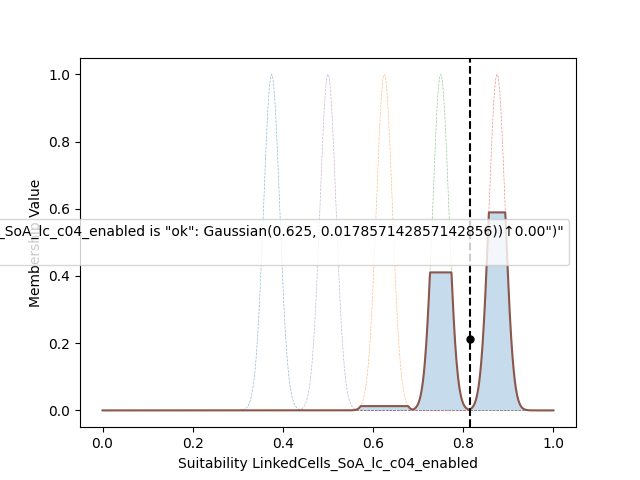

In [ ]:
data = {"maxDensity": 0.1, "maxParticlesPerCell": 2,  "homogeneity": 0.1,
        "particlesPerCellStdDev": 0.1, "avgParticlesPerCell": 0.1, "threadCount": 10}


union = fiss["Suitability LinkedCells_SoA_lc_c04_enabled"].applyRules(data)

fig, ax = plt.subplots()
union.plot(ax=ax, n=1000, defuzzifiationMethod="cog")

print("Union: ", union)

prediction = fiss["Suitability LinkedCells_SoA_lc_c04_enabled"].predictClosest(
    data, algo_ranking["Suitability LinkedCells_SoA_lc_c04_enabled"], n=600,method="cog")[1]

print("Prediction: ", prediction)

In [ ]:
import numpy as np

X = np.linspace(0, 1.5, 20)
Y = np.linspace(0, 4, 20)

In [ ]:
Z_cog = np.array(
    [[fiss["Suitability LinkedCells_SoA_lc_c04_enabled"].predict({"homogeneity": x, "avgParticlesPerCell": y,"threadCount":16,"maxDensity":1.4}, method="cog") for x in X] for y in Y])

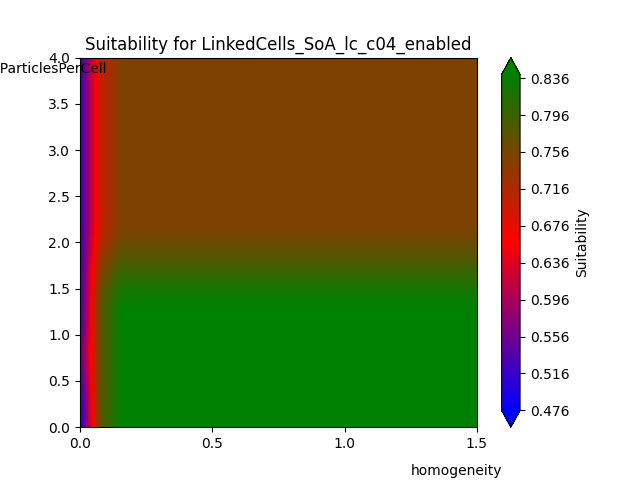

In [ ]:
import matplotlib as mpl

def plot(X, Y, Z):
    fig, axs = plt.subplots(1)
    axs.set_xlabel("homogeneity")
    axs.set_ylabel("avgParticlesPerCell")

    # xlabes only integers
    axs.set_xticks(np.arange(0, 5.5, 0.5))
    axs.set_yticks(np.arange(0, 4.5, 0.5))

    # label positions at end of axis
    axs.xaxis.set_label_coords(0.95, -0.1)
    axs.yaxis.set_label_coords(-0.1, 0.95)

    # y label rotated
    axs.yaxis.label.set_rotation(0)

    my_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        "", ["blue", "red", "green"])

    countour = axs.contourf(X, Y, Z, levels=100,
                            cmap=my_cmap, extend='both')

    cbar = fig.colorbar(countour, ax=axs)
    cbar.set_label("Suitability")

    #title
    axs.set_title(f"Suitability for LinkedCells_SoA_lc_c04_enabled")

    return fig



plot(X, Y, Z_cog);